In [3]:
import pandas as pd

# Cargar el archivo Excel
df = pd.read_excel("Tarea Proyecto.xlsx")  # Asegúrate de que el archivo esté en el mismo directorio que tu notebook

# Ver las primeras filas
print(df.head())

   ID Transaccion      Fecha    Vendedor Region    Categoria Producto  \
0            1001 2023-10-01   Ana Gomez  Norte  Electronica   Laptop   
1            1002 2023-10-01  Juan Perez    Sur    Accesorio  Teclado   
2            1003 2023-10-02   Ana Gomez  Norte    Monitores  Monitor   
3            1004 2023-10-03  Luis Ramos  Norte  Electronica   Laptop   

   Cantidad  Precio Unitario  Total Ventas  
0         5              600          3000  
1        10               25           250  
2         8              300          2400  
3         3              600          1800  


In [5]:
pip install pandas matplotlib python-docx openpyxl -q


Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd

# Cargar el archivo Excel
archivo = "Tarea Proyecto.xlsx"
xls = pd.ExcelFile(archivo)

# Mostrar las hojas disponibles
print(xls.sheet_names)

['Sheet1']


C:\Users\Josè\AppData\Local\Temp\ipykernel_24220\534710669.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Categoria, x='Producto', y='Total Ventas', palette='viridis')


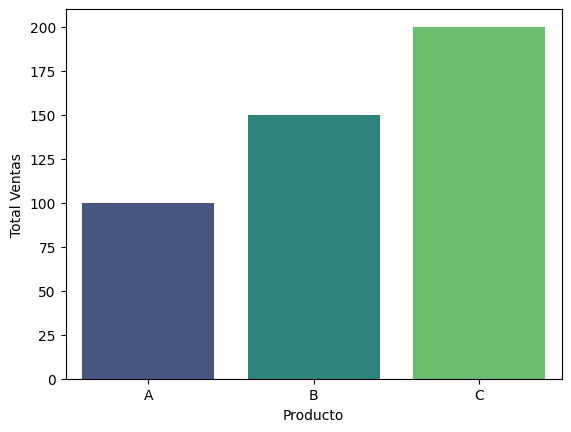

<Figure size 640x480 with 0 Axes>

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example DataFrame (replace with your actual data)
Categoria = pd.DataFrame({
    'Producto': ['A', 'B', 'C'],
    'Total Ventas': [100, 150, 200]
})

sns.barplot(data=Categoria, x='Producto', y='Total Ventas', palette='viridis')
plt.show()

png = plt.savefig("grafico_ventas.png")

In [34]:
pip install python-docx -q

Note: you may need to restart the kernel to use updated packages.


In [35]:
from docx import Document
from docx.shared import Inches

# Crear el documento
doc = Document()

# Agregar título
doc.add_heading("Reporte de Ventas", level=1)

# Agregar párrafo
doc.add_paragraph("Este documento contiene un resumen de ventas con gráficos incluidos.")

# Agregar imagen (asegúrate de que exista en tu directorio)
import matplotlib.pyplot as plt

plt.savefig("grafico_ventas.png") 
plt.close()

# Guardar el documento
doc.save("reporte_ventas.docx")

In [36]:
import pandas as pd

# Cargar el archivo
archivo = "Tarea Proyecto.xlsx"
df = pd.read_excel(archivo)

# Estandarizar columnas
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [49]:
resumen_producto = df.groupby("producto")["total_ventas"].agg(["sum", "mean", "max", "min"])
print(resumen_producto)

           sum    mean   max   min
producto                          
Laptop    4800  2400.0  3000  1800
Monitor   2400  2400.0  2400  2400
Teclado    250   250.0   250   250


In [50]:
resumen_region = df.groupby("region")["total_ventas"].sum()
resumen_categoria = df.groupby("categoria")["total_ventas"].sum()

In [51]:
df["fecha"] = pd.to_datetime(df["fecha"])
ventas_por_dia = df.groupby(df["fecha"].dt.date)["total_ventas"].sum()

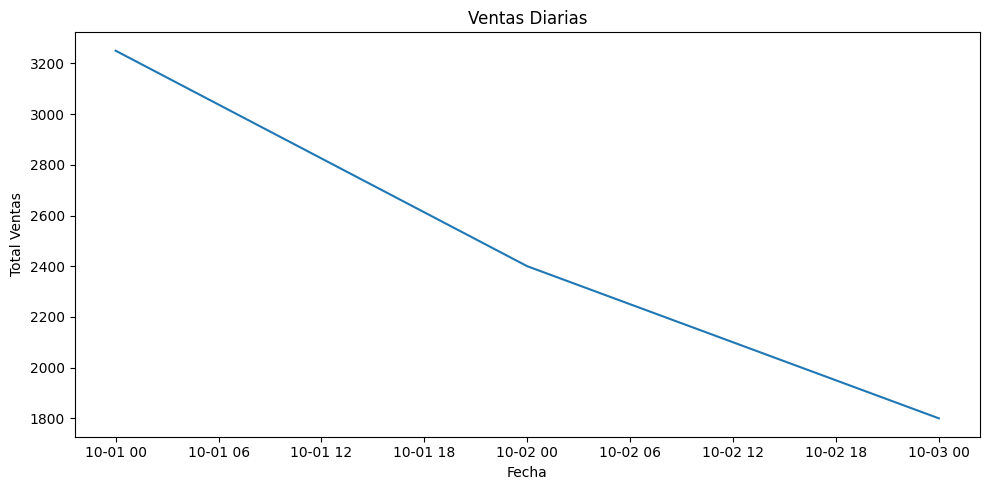

In [52]:
import matplotlib.pyplot as plt

ventas_por_dia.plot(kind="line", figsize=(10,5), title="Ventas Diarias")
plt.xlabel("Fecha")
plt.ylabel("Total Ventas")
plt.tight_layout()
plt.show()

In [53]:
resumen_producto.to_excel("resumen_por_producto.xlsx")

In [54]:
pip install gTTS -q

Note: you may need to restart the kernel to use updated packages.


In [55]:
texto = "Resumen de ventas por producto:\n"
for producto, fila in resumen_producto.iterrows():
    texto += f"{producto}: Total = {fila['sum']:.2f}, Promedio = {fila['mean']:.2f}, Máximo = {fila['max']:.2f}, Mínimo = {fila['min']:.2f}\n"

In [56]:
from gtts import gTTS

tts = gTTS(text=texto, lang='es', slow=False)
tts.save("resumen_ventas.mp3")

In [57]:
pip install secure-smtplib -q

Note: you may need to restart the kernel to use updated packages.


In [61]:
import smtplib
from email.message import EmailMessage

# Configuración del correo
remitente = "josecolinadel7@gmail.com"
destinatario = "Daniel.z.espitia@gmail.com"
asunto = "Resumen de Ventas por Producto"
cuerpo = "Adjunto encontrarás el resumen de ventas generado automáticamente."

# Crear mensaje
msg = EmailMessage()
msg["From"] = remitente
msg["To"] = destinatario
msg["Subject"] = asunto
msg.set_content(cuerpo)

# Adjuntar archivo Word
with open("reporte_ventas.docx", "rb") as f:
    archivo = f.read()
    nombre = f.name
    msg.add_attachment(archivo, maintype="application", subtype="vnd.openxmlformats-officedocument.wordprocessingml.document", filename=nombre)

# Enviar correo (usando Gmail como ejemplo)
with smtplib.SMTP_SSL("smtp.gmail.com", 465) as smtp:
    smtp.login("josecolinadel7@gmail.com", "npua fqvd tkba domo")
    smtp.send_message(msg)

In [60]:
pip install fpdf2 -q

Note: you may need to restart the kernel to use updated packages.


In [62]:
log = [
    "Inicio del proceso de análisis de ventas.",
    "Archivo Excel cargado correctamente.",
    "Resumen por producto generado.",
    "Documento Word creado y guardado.",
    "Audio resumen generado en formato MP3.",
    "Correo enviado con el archivo adjunto.",
    "Log exportado a PDF exitosamente."
]

In [63]:
from fpdf import FPDF

class PDF(FPDF):
    def header(self):
        self.set_font("Arial", "B", 14)
        self.cell(0, 10, "Log del Proceso de Automatización", ln=True, align="C")
        self.ln(10)

    def footer(self):
        self.set_y(-15)
        self.set_font("Arial", "I", 10)
        self.cell(0, 10, f"Página {self.page_no()}", align="C")

# Crear PDF
pdf = PDF()
pdf.add_page()
pdf.set_font("Arial", size=12)

for linea in log:
    pdf.multi_cell(0, 10, f"- {linea}")

# Guardar PDF
pdf.output("log_proceso.pdf")

''